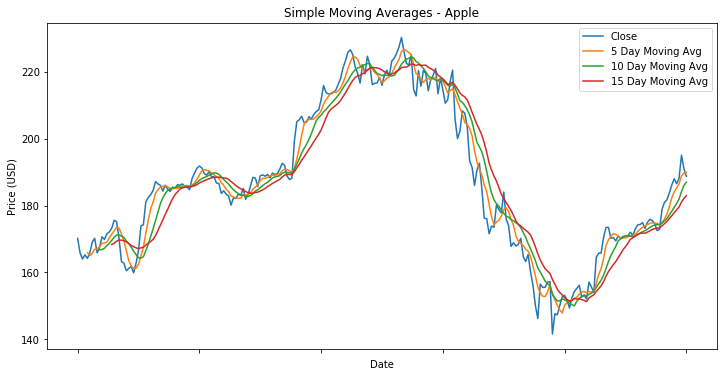

In [29]:
# Indicator 1 - Simple Moving Average (SMA)
# Apple Data

import pandas as pd
import matplotlib.pyplot as plt

appl = pd.DataFrame()
appl = pd.read_csv("AAPL.csv", usecols=[0, 5],index_col=0)
appl['Close'] = appl

#1 Close Price
# automatic
#2 ROI (Price[t]/price[t-1]-1)
appl['ROI'] = appl['Close'] / appl['Close'].shift(periods=-1) - 1
#3 SMA5
appl['5 Day Moving Avg'] = appl['Close'].rolling(window=5).mean()
#4 SMA10
appl['10 Day Moving Avg'] = appl['Close'].rolling(window=10).mean()
#5 SMA15
appl['15 Day Moving Avg'] = appl['Close'].rolling(window=15).mean()
#6 Buysignal1 (SMA5 crosses above SMA10) (0 or 1) 
appl['buysignal1'] = appl['5 Day Moving Avg'] - appl['10 Day Moving Avg']
appl.loc[appl['buysignal1'] > 0, 'buysignal1'] = 1
appl.loc[appl['buysignal1'] < 0, 'buysignal1'] = 0
#7 Buysignal2 (SMA10 crosses above SMA15) (0 or 1) 
appl['buysignal2'] = appl['10 Day Moving Avg'] - appl['15 Day Moving Avg']
appl.loc[appl['buysignal2'] > 0, 'buysignal2'] = 1
appl.loc[appl['buysignal2'] < 0, 'buysignal2'] = 0
#8 Sellsignal1(SMA5  crosses below SMA 10) (0 or 1)
appl['sellsignal1'] = appl['5 Day Moving Avg'] - appl['10 Day Moving Avg']
appl.loc[appl['sellsignal1'] > 0, 'sellsignal1'] = 1
appl.loc[appl['sellsignal1'] < 0, 'sellsignal1'] = 0
#9 Sellsignal2(SMA10  crosses below SMA 15) (0 or 1)
appl['sellsignal2'] = appl['10 Day Moving Avg'] - appl['15 Day Moving Avg']
appl.loc[appl['sellsignal2'] > 0, 'sellsignal2'] = 1
appl.loc[appl['sellsignal2'] < 0, 'sellsignal2'] = 0
#10(Close price)/SMA5
appl['close-sma5'] = appl['Close']/appl['5 Day Moving Avg']
#11 (Close price)/SMA10
appl['close-sma10'] = appl['Close']/appl['10 Day Moving Avg']
#12 (Close price)/SMA15
appl['close-sma15'] = appl['Close']/appl['15 Day Moving Avg']

#print(appl)

appl[['Close', '5 Day Moving Avg', '10 Day Moving Avg', '15 Day Moving Avg']].plot(figsize=(12,6))
plt.title('Simple Moving Averages - Apple')
plt.ylabel('Price (USD)')
plt.show()

appl.to_csv("appl-sma.csv")

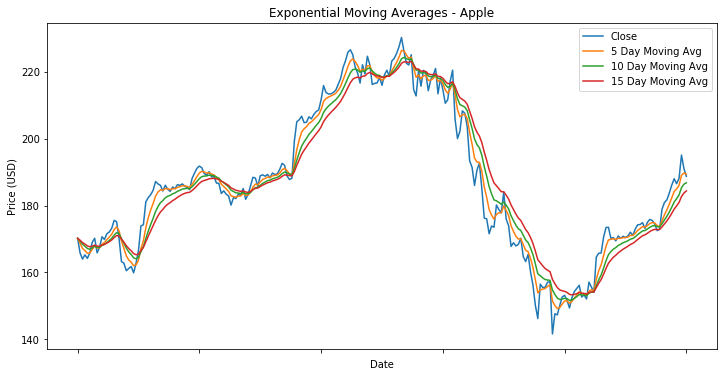

In [30]:
# Indicator 2 - Exponential Moving Average (EMA)
# Dow Jones Data

#Drop unnecessary columns
appl.drop(['close-sma5', 'close-sma10', 'close-sma15'], axis=1)

#From https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/
#1 Close Price
# automatic
#2 ROI (Price[t]/price[t-1]-1)
appl['ROI'] = appl['Close'] / appl['Close'].shift(periods=-1) - 1
#3 EMA5
appl['5 Day Moving Avg'] = appl['Close'].ewm(span=5, adjust=False).mean()
#4 EMA10
appl['10 Day Moving Avg'] = appl['Close'].ewm(span=10, adjust=False).mean()
#5 EMA15
appl['15 Day Moving Avg'] = appl['Close'].ewm(span=15, adjust=False).mean()
#6 Buysignal1 (EMA5 crosses above EMA10) (0 or 1)
appl['buysignal1'] = appl['5 Day Moving Avg'] - appl['10 Day Moving Avg']
appl.loc[appl['buysignal1'] > 0, 'buysignal1'] = 1
appl.loc[appl['buysignal1'] < 0, 'buysignal1'] = 0
#7 Buysignal2 (EMA10 crosses above EMA15) (0 or 1)
appl['buysignal2'] = appl['10 Day Moving Avg'] - appl['15 Day Moving Avg']
appl.loc[appl['buysignal2'] > 0, 'buysignal2'] = 1
appl.loc[appl['buysignal2'] < 0, 'buysignal2'] = 0
#8 Sellsignal1(EMA5  crosses below EMA 10) (0 or 1)
appl['sellsignal1'] = appl['5 Day Moving Avg'] - appl['10 Day Moving Avg']
appl.loc[appl['sellsignal1'] > 0, 'sellsignal1'] = 1
appl.loc[appl['sellsignal1'] < 0, 'sellsignal1'] = 0
#9 Sellsignal2(EMA10  crosses below EMA 15) (0 or 1)
appl['sellsignal2'] = appl['10 Day Moving Avg'] - appl['15 Day Moving Avg']
appl.loc[appl['sellsignal2'] > 0, 'sellsignal2'] = 1
appl.loc[appl['sellsignal2'] < 0, 'sellsignal2'] = 0
#10(Close price)/EMA5
appl['close-ema5'] = appl['Close']/appl['5 Day Moving Avg']
#11 (Close price)/EMA10
appl['close-ema10'] = appl['Close']/appl['10 Day Moving Avg']
#12 (Close price)/EMA15
appl['close-ema15'] = appl['Close']/appl['15 Day Moving Avg']

#print(appl)

appl[['Close', '5 Day Moving Avg', '10 Day Moving Avg', '15 Day Moving Avg']].plot(figsize=(12,6))
plt.title('Exponential Moving Averages - Apple')
plt.ylabel('Price (USD)')
plt.show()

appl.to_csv('appl-ema.csv')

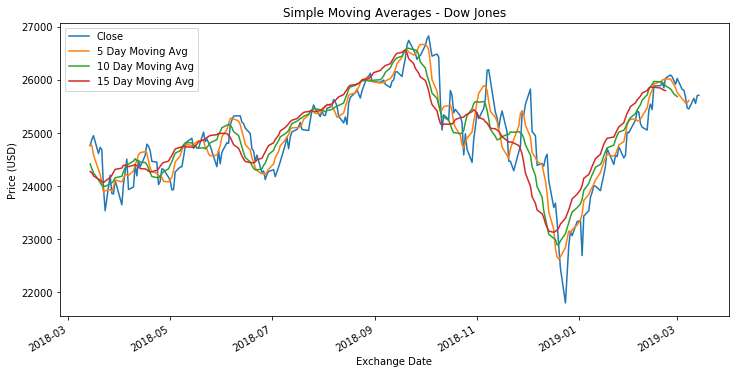

In [31]:
# Indicator 1 - Simple Moving Average (SMA)
# Dow Jones Data

import pandas as pd
import matplotlib.pyplot as plt

dji = pd.DataFrame()
dji = pd.read_excel("Assignment 3&4-data files/{}.xlsx".format('DJI-daily'), skiprows=22,usecols=[0, 1],index_col=0)


#1 Close Price
# automatic
#2 ROI (Price[t]/price[t-1]-1)
dji['ROI'] = dji['Close'] / dji['Close'].shift(periods=-1) - 1
#3 SMA5
dji['5 Day Moving Avg'] = dji['Close'].rolling(window=5).mean()
#4 SMA10
dji['10 Day Moving Avg'] = dji['Close'].rolling(window=10).mean()
#5 SMA15
dji['15 Day Moving Avg'] = dji['Close'].rolling(window=15).mean()
#6 Buysignal1 (SMA5 crosses above SMA10) (0 or 1) 
dji['buysignal1'] = dji['5 Day Moving Avg'] - dji['10 Day Moving Avg']
dji.loc[dji['buysignal1'] > 0, 'buysignal1'] = 1
dji.loc[dji['buysignal1'] < 0, 'buysignal1'] = 0
#7 Buysignal2 (SMA10 crosses above SMA15) (0 or 1) 
dji['buysignal2'] = dji['10 Day Moving Avg'] - dji['15 Day Moving Avg']
dji.loc[dji['buysignal2'] > 0, 'buysignal2'] = 1
dji.loc[dji['buysignal2'] < 0, 'buysignal2'] = 0
#8 Sellsignal1(SMA5  crosses below SMA 10) (0 or 1)
dji['sellsignal1'] = dji['5 Day Moving Avg'] - dji['10 Day Moving Avg']
dji.loc[dji['sellsignal1'] > 0, 'sellsignal1'] = 1
dji.loc[dji['sellsignal1'] < 0, 'sellsignal1'] = 0
#9 Sellsignal2(SMA10  crosses below SMA 15) (0 or 1)
dji['sellsignal2'] = dji['10 Day Moving Avg'] - dji['15 Day Moving Avg']
dji.loc[dji['sellsignal2'] > 0, 'sellsignal2'] = 1
dji.loc[dji['sellsignal2'] < 0, 'sellsignal2'] = 0
#10(Close price)/SMA5
dji['close-sma5'] = dji['Close']/dji['5 Day Moving Avg']
#11 (Close price)/SMA10
dji['close-sma10'] = dji['Close']/dji['10 Day Moving Avg']
#12 (Close price)/SMA15
dji['close-sma15'] = dji['Close']/dji['15 Day Moving Avg']

#print(dji)

dji[['Close', '5 Day Moving Avg', '10 Day Moving Avg', '15 Day Moving Avg']].plot(figsize=(12,6))
plt.title('Simple Moving Averages - Dow Jones')
plt.ylabel('Price (USD)')
plt.show()

dji.to_csv("dji-sma.csv")

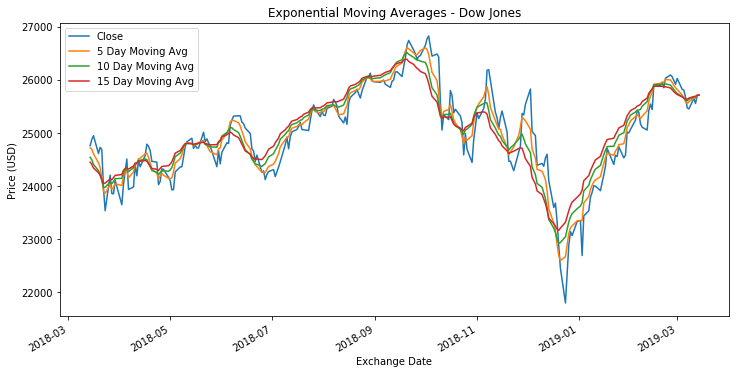

In [32]:
# Indicator 2 - Exponential Moving Average (EMA)
# Dow Jones Data

#Drop unnecessary columns
dji.drop(['close-sma5', 'close-sma10', 'close-sma15'], axis=1)

#From https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/
#1 Close Price
# automatic
#2 ROI (Price[t]/price[t-1]-1)
dji['ROI'] = dji['Close'] / dji['Close'].shift(periods=-1) - 1
#3 EMA5
dji['5 Day Moving Avg'] = dji['Close'].ewm(span=5, adjust=False).mean()
#4 EMA10
dji['10 Day Moving Avg'] = dji['Close'].ewm(span=10, adjust=False).mean()
#5 EMA15
dji['15 Day Moving Avg'] = dji['Close'].ewm(span=15, adjust=False).mean()
#6 Buysignal1 (EMA5 crosses above EMA10) (0 or 1)
dji['buysignal1'] = dji['5 Day Moving Avg'] - dji['10 Day Moving Avg']
dji.loc[dji['buysignal1'] > 0, 'buysignal1'] = 1
dji.loc[dji['buysignal1'] < 0, 'buysignal1'] = 0
#7 Buysignal2 (EMA10 crosses above EMA15) (0 or 1)
dji['buysignal2'] = dji['10 Day Moving Avg'] - dji['15 Day Moving Avg']
dji.loc[dji['buysignal2'] > 0, 'buysignal2'] = 1
dji.loc[dji['buysignal2'] < 0, 'buysignal2'] = 0
#8 Sellsignal1(EMA5  crosses below EMA 10) (0 or 1)
dji['sellsignal1'] = dji['5 Day Moving Avg'] - dji['10 Day Moving Avg']
dji.loc[dji['sellsignal1'] > 0, 'sellsignal1'] = 1
dji.loc[dji['sellsignal1'] < 0, 'sellsignal1'] = 0
#9 Sellsignal2(EMA10  crosses below EMA 15) (0 or 1)
dji['sellsignal2'] = dji['10 Day Moving Avg'] - dji['15 Day Moving Avg']
dji.loc[dji['sellsignal2'] > 0, 'sellsignal2'] = 1
dji.loc[dji['sellsignal2'] < 0, 'sellsignal2'] = 0
#10(Close price)/EMA5
dji['close-ema5'] = dji['Close']/dji['5 Day Moving Avg']
#11 (Close price)/EMA10
dji['close-ema10'] = dji['Close']/dji['10 Day Moving Avg']
#12 (Close price)/EMA15
dji['close-ema15'] = dji['Close']/dji['15 Day Moving Avg']

#print(dji)

dji[['Close', '5 Day Moving Avg', '10 Day Moving Avg', '15 Day Moving Avg']].plot(figsize=(12,6))
plt.title('Exponential Moving Averages - Dow Jones')
plt.ylabel('Price (USD)')
plt.show()

dji.to_csv('dji-ema.csv')

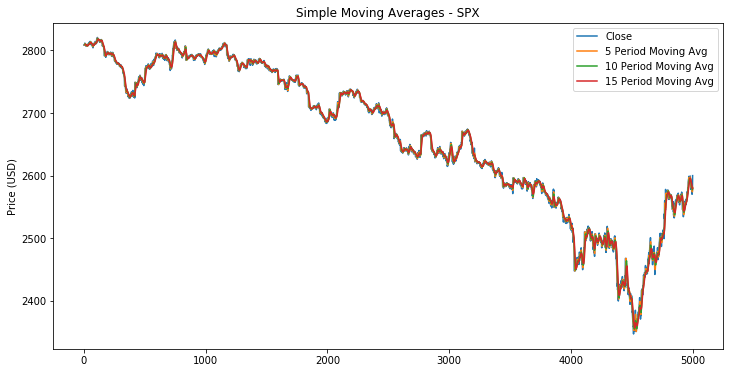

In [33]:
# Indicator 1 - Simple Moving Average (SMA)
# SPX Data

import pandas as pd
import matplotlib.pyplot as plt

spx = pd.DataFrame()
spx = pd.read_excel("Assignment 3&4-data files/{}.xlsx".format('SPX-5min'), skiprows=13,usecols=[2])
spx['Close'] = spx

#1 Close Price

#2 ROI (Price[t]/price[t-1]-1)
spx['ROI'] = spx['Close'] / spx['Close'].shift(periods=-1) - 1
#3 SMA5
spx['5 Period Moving Avg'] = spx['Close'].rolling(window=5).mean()
#4 SMA10
spx['10 Period Moving Avg'] = spx['Close'].rolling(window=10).mean()
#5 SMA15
spx['15 Period Moving Avg'] = spx['Close'].rolling(window=15).mean()
#6 Buysignal1 (SMA5 crosses above SMA10) (0 or 1) 
spx['buysignal1'] = spx['5 Period Moving Avg'] - spx['10 Period Moving Avg']
spx.loc[spx['buysignal1'] > 0, 'buysignal1'] = 1
spx.loc[spx['buysignal1'] < 0, 'buysignal1'] = 0
#7 Buysignal2 (SMA10 crosses above SMA15) (0 or 1) 
spx['buysignal2'] = spx['10 Period Moving Avg'] - spx['15 Period Moving Avg']
spx.loc[spx['buysignal2'] > 0, 'buysignal2'] = 1
spx.loc[spx['buysignal2'] < 0, 'buysignal2'] = 0
#8 Sellsignal1(SMA5  crosses below SMA 10) (0 or 1)
spx['sellsignal1'] = spx['5 Period Moving Avg'] - spx['10 Period Moving Avg']
spx.loc[spx['sellsignal1'] > 0, 'sellsignal1'] = 1
spx.loc[spx['sellsignal1'] < 0, 'sellsignal1'] = 0
#9 Sellsignal2(SMA10  crosses below SMA 15) (0 or 1)
spx['sellsignal2'] = spx['10 Period Moving Avg'] - spx['15 Period Moving Avg']
spx.loc[spx['sellsignal2'] > 0, 'sellsignal2'] = 1
spx.loc[spx['sellsignal2'] < 0, 'sellsignal2'] = 0
#10(Close price)/SMA5
spx['close-sma5'] = spx['Close']/spx['5 Period Moving Avg']
#11 (Close price)/SMA10
spx['close-sma10'] = spx['Close']/spx['10 Period Moving Avg']
#12 (Close price)/SMA15
spx['close-sma15'] = spx['Close']/spx['15 Period Moving Avg']

#print(spx)

spx[['Close', '5 Period Moving Avg', '10 Period Moving Avg', '15 Period Moving Avg']].plot(figsize=(12,6))
plt.title('Simple Moving Averages - SPX')
plt.ylabel('Price (USD)')
plt.show()

spx.to_csv("spx-sma.csv")

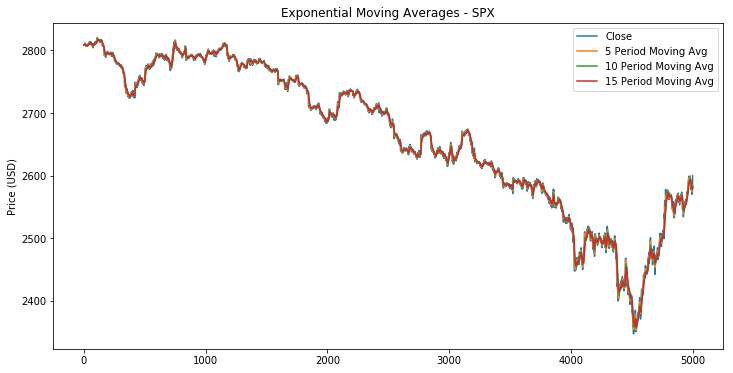

In [34]:
# Indicator 2 - Exponential Moving Average (EMA)
# Dow Jones Data

#Drop unnecessary columns
spx.drop(['close-sma5', 'close-sma10', 'close-sma15',], axis=1)

#From https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/
#1 Close Price
# automatic
#2 ROI (Price[t]/price[t-1]-1)
spx['ROI'] = spx['Close'] / spx['Close'].shift(periods=-1) - 1
#3 EMA5
spx['5 Period Moving Avg'] = spx['Close'].ewm(span=5, adjust=False).mean()
#4 EMA10
spx['10 Period Moving Avg'] = spx['Close'].ewm(span=10, adjust=False).mean()
#5 EMA15
spx['15 Period Moving Avg'] = spx['Close'].ewm(span=15, adjust=False).mean()
#6 Buysignal1 (EMA5 crosses above EMA10) (0 or 1)
spx['buysignal1'] = spx['5 Period Moving Avg'] - spx['10 Period Moving Avg']
spx.loc[spx['buysignal1'] > 0, 'buysignal1'] = 1
spx.loc[spx['buysignal1'] < 0, 'buysignal1'] = 0
#7 Buysignal2 (EMA10 crosses above EMA15) (0 or 1)
spx['buysignal2'] = spx['10 Period Moving Avg'] - spx['15 Period Moving Avg']
spx.loc[spx['buysignal2'] > 0, 'buysignal2'] = 1
spx.loc[spx['buysignal2'] < 0, 'buysignal2'] = 0
#8 Sellsignal1(EMA5  crosses below EMA 10) (0 or 1)
spx['sellsignal1'] = spx['5 Period Moving Avg'] - spx['10 Period Moving Avg']
spx.loc[spx['sellsignal1'] > 0, 'sellsignal1'] = 1
spx.loc[spx['sellsignal1'] < 0, 'sellsignal1'] = 0
#9 Sellsignal2(EMA10  crosses below EMA 15) (0 or 1)
spx['sellsignal2'] = spx['10 Period Moving Avg'] - spx['15 Period Moving Avg']
spx.loc[spx['sellsignal2'] > 0, 'sellsignal2'] = 1
spx.loc[spx['sellsignal2'] < 0, 'sellsignal2'] = 0
#10(Close price)/EMA5
spx['close-ema5'] = spx['Close']/spx['5 Period Moving Avg']
#11 (Close price)/EMA10
spx['close-ema10'] = spx['Close']/spx['10 Period Moving Avg']
#12 (Close price)/EMA15
spx['close-ema15'] = spx['Close']/spx['15 Period Moving Avg']

#print(spx)

spx[['Close', '5 Period Moving Avg', '10 Period Moving Avg', '15 Period Moving Avg']].plot(figsize=(12,6))
plt.title('Exponential Moving Averages - SPX')
plt.ylabel('Price (USD)')
plt.show()

spx.to_csv('spx-ema.csv')